# Network analysis & GIS

We will introduce two modules in Python: networkx and geopandas. Networkx is used for classical network analysis, while GeoPandas is the extension of Pandas into spatial analysis. As you will see GeoPandas could achieve most of the things the ArcGIS could do. The strength of Geopandas is its computational efficiency, while its weakness is its lack of interactive interface as in ArcGIS. However, the interactive interface in ArcGIS consumes a lot of computational resource, which renders GeoPandas an efficient spatial processing tool in Python.

*   Section 0. Reading files
*   Section 1. Visualizing nodes and edges (GIS)




## Section 0. Reading the files

In [ ]:
# Install packages
!pip install geopandas
!pip install pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 9.8 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# import modules (old)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import modules (new)
import geopandas as gpd
import networkx as nx
from pysal.lib import weights
from pysal.lib import cg as geometry

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-3-38a139fb5e54>:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  impo

In [ ]:
# define the mounting point on Google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Switch to Colab Notebooks.
# Mac system
# !cd '/content/drive/My Drive/Colab Notebooks/data/'
# Windows system
%cd /content/drive/My Drive/Colab Notebooks/data/

/content/drive/My Drive/Colab Notebooks/data


In [ ]:
# read the data and shapefile
df = pd.read_csv('Florida_ct.csv', index_col = 0)
florida_shapefile = gpd.read_file('tl_2020_12_tract/tl_2020_12_tract.shp') # read the shapefile

In [ ]:
# view the dataframe
df.head()

,pop_total,sex_total,sex_male,sex_female,age_median,households,race_total,race_white,race_black,race_native,...,travel_walk_ratio,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,edu_higher_edu_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio
0,2812.0,2812.0,1383.0,1429.0,39.4,931.0,2812.0,2086.0,517.0,0.0,...,0.014815,0.024242,0.183838,0.029798,0.003030,0.216667,0.286635,0.528094,1.595059,0.155938
1,4709.0,4709.0,2272.0,2437.0,34.2,1668.0,4709.0,2382.0,1953.0,0.0,...,0.022150,0.004615,0.135222,0.040245,0.003220,0.178686,0.318327,0.460183,1.299161,0.152869
2,5005.0,5005.0,2444.0,2561.0,34.1,1379.0,5005.0,2334.0,2206.0,224.0,...,0.026141,0.027913,0.213247,0.064620,0.007431,0.285299,0.366755,0.450949,1.636693,0.162211
3,6754.0,6754.0,2934.0,3820.0,31.3,2238.0,6754.0,4052.0,1671.0,326.0,...,0.052697,0.004054,0.093379,0.082510,0.012599,0.188488,0.314452,0.474830,1.432976,0.178716
4,3021.0,3021.0,1695.0,1326.0,44.1,1364.0,3021.0,2861.0,121.0,0.0,...,0.003014,0.013059,0.219868,0.138631,0.007064,0.365563,0.218447,0.659053,1.459677,0.335930


In [ ]:
# view the shapefile
florida_shapefile.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,12,011,110403,12011110403,1104.03,Census Tract 1104.03,G5020,S,1323099,0,+25.9882712,-080.2428385,"POLYGON ((-80.24758 25.99480, -80.24754 25.994..."
1,12,011,060114,12011060114,601.14,Census Tract 601.14,G5020,S,2598912,0,+26.1864137,-080.2598783,"POLYGON ((-80.26810 26.19368, -80.26702 26.193..."
2,12,011,060120,12011060120,601.20,Census Tract 601.20,G5020,S,12814719,1823779,+26.1433192,-080.3341825,"POLYGON ((-80.36670 26.12828, -80.36649 26.128..."
3,12,011,110347,12011110347,1103.47,Census Tract 1103.47,G5020,S,2846117,545293,+26.0230637,-080.4006685,"POLYGON ((-80.40957 26.03541, -80.40878 26.035..."
4,12,011,020421,12011020421,204.21,Census Tract 204.21,G5020,S,1060862,16632,+26.2129463,-080.2358809,"POLYGON ((-80.24061 26.22083, -80.24056 26.220..."


In [ ]:
# shape of the two files.
print(df.shape)
print(florida_shapefile.shape)

(4167, 88)
(5160, 13)


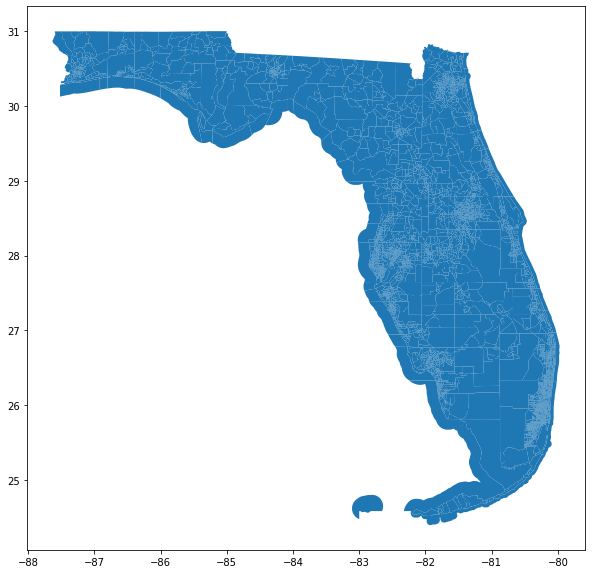

In [ ]:
# quick view of the shapefile.
florida_shapefile.plot(figsize = (10,10))
plt.show()

## Preprocessing the data

In [ ]:
# adjust the object types to facilitate the merge
florida_shapefile['GEOID'] = florida_shapefile.GEOID.astype('int64')

In [ ]:
# combine the dataframe with the shapefile.
# Note that it is important to choose how - e.g., inner, right, left, etc. Here I choose 'left' for teaching purposes.
df_shp = florida_shapefile.merge(df,
                                 how = 'left',
                                 left_on = 'GEOID',
                                 right_on = 'full_ct_fips')


In [ ]:
# check the shape of the new file.
# It combines the census data set and the shapefile.
df_shp.shape
# 101 = 88 + 13

(5160, 101)

In [ ]:
# With the current approach, I will fill in ZEROS into the NaN values.
# However, it is NOT necessarily the best approach.
df_shp = df_shp.fillna(0.0)

# Section 1. Visualizing nodes and edges in a spatial network.

GIS practice is a specific case of the general network analysis, certainly with its spcialization. In most of the cases, people use some spatial units as the unit of analysis, and census tract is one of the most common spatial units. Therefore, the GIS visulization is the same as visualizing the node features of a spatial graph.

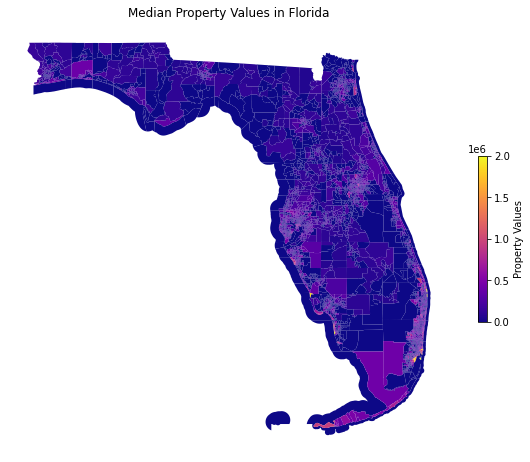

In [ ]:
# example 1.0
# visualizing property values of the whole Florida
fig, ax = plt.subplots(figsize=(8, 8))

ax.axis('off') # remove the axis
df_shp.plot(column = 'property_value_median', cmap = 'plasma', legend=True,
            legend_kwds={'label': "Property Values", 'orientation': "vertical", 'shrink': 0.3},
            ax = ax)
ax.set_title('Median Property Values in Florida')

plt.tight_layout()
plt.show()

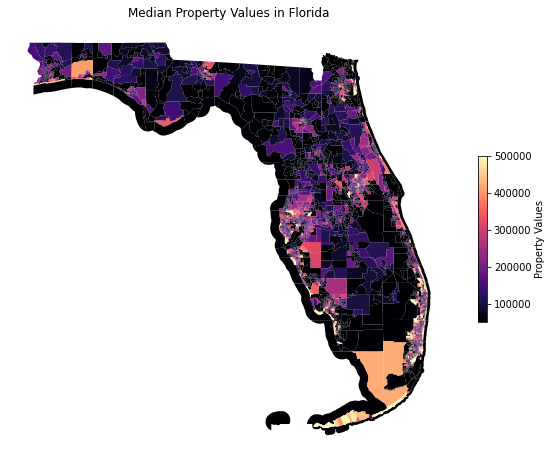

In [ ]:
# example 1.1. adjusting the legend vmin and vmax to highlight the areas with high property values.
# visualizing property values of the whole Florida.

fig, ax = plt.subplots(figsize=(8, 8))

ax.axis('off') # remove the axies
df_shp.plot(column = 'property_value_median', cmap = 'magma', legend=True, alpha = 1.0,
            vmin = 50000, vmax = 500000,
            legend_kwds={'label': "Property Values", 'orientation': "vertical", 'shrink': 0.3},
            ax = ax)
ax.set_title('Median Property Values in Florida')

plt.tight_layout()
plt.show()


## **Exercise** Visualizing household income in Florida

**How to zoom into a certain region?** Two approaches

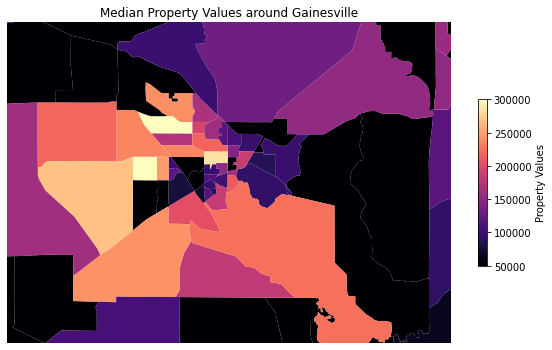

In [ ]:
# example 2.1. use the Florida shapefile but adjust the longitude and latitude to show a small area.
# x is the longitude.
# y is the latitude.

x_min = -82.649702
y_max = 29.827481
x_max = -82.025303
y_min = 29.428041

fig, ax = plt.subplots(figsize=(8, 8))

ax.axis('off') # remove the axies
# df_shp.plot(facecolor="None", edgecolor='black', linewidth=0.1, ax = ax)
df_shp.plot(column = 'property_value_median', cmap = 'magma', legend=True, alpha = 1.0,
            vmin = 50000, vmax = 300000,
            legend_kwds={'label': "Property Values", 'orientation': "vertical", 'shrink': 0.3},
            ax = ax)
ax.set_title('Median Property Values around Gainesville')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()


In [ ]:
# example 2.2. Visualize only a subset.
# create a subset of the full data set.
Alachua_shp = df_shp.loc[df_shp.COUNTYFP == '001', :].reset_index()
print("The size of the Alachua shapefile is: ", Alachua_shp.shape)

# create a column for the coordinates
Alachua_shp['coords'] = Alachua_shp['geometry'].apply(lambda x: x.representative_point().coords[:])
Alachua_shp['coords'] = [coords[0] for coords in Alachua_shp['coords']]

The size of the Alachua shapefile is:  (58, 102)


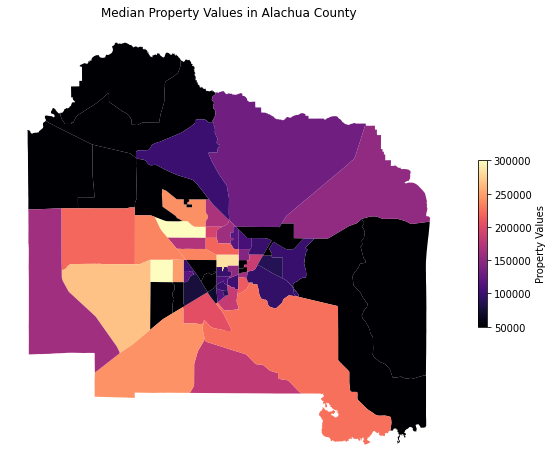

In [ ]:
# example 2.2. visualizing only the Alachua county.
fig, ax = plt.subplots(figsize=(8, 8))

ax.axis('off') # remove the axies
# df_shp.plot(facecolor="None", edgecolor='black', linewidth=0.1, ax = ax)
Alachua_shp.plot(column = 'property_value_median', cmap = 'magma', legend=True, alpha = 1.0,
            vmin = 50000, vmax = 300000,
            legend_kwds={'label': "Property Values", 'orientation': "vertical", 'shrink': 0.3},
            ax = ax)
ax.set_title('Median Property Values in Alachua County')

plt.tight_layout()
plt.show()

## Creating edges, check the adjacency matrix, and visualizing edges.

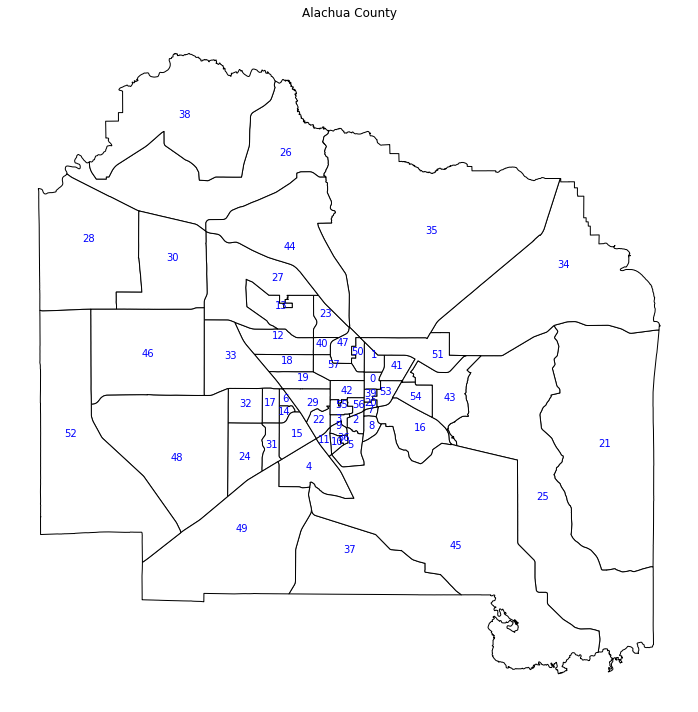

In [ ]:
# example 3.1. visualizing only the Alachua county.
fig, ax = plt.subplots(figsize=(10, 10))

ax.axis('off') # remove the axies
# df_shp.plot(facecolor="None", edgecolor='black', linewidth=0.1, ax = ax)
Alachua_shp.plot(color = 'white', edgecolor = 'black', ax = ax)

for idx, row in Alachua_shp.iterrows():
  plt.annotate(s=idx, horizontalalignment='center', color='blue', xy=row['coords'])

ax.set_title('Alachua County')

plt.tight_layout()
plt.show()

In [ ]:
# Creating the adjacency matrix.
w_queen = weights.contiguity.Queen.from_dataframe(Alachua_shp)

In [ ]:
# Visualizing the adjacency matrix (20*20)
# the matrix view of the adjacency matrix.

w_queen_df = pd.DataFrame(w_queen.full()[0],
                          columns = w_queen.full()[1],
                          index = w_queen.full()[1])

# set up the printing option
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# printing only the first 20 columns & rows
w_queen_df.iloc[:20, :20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Preparing for visualizing the edges by reprojecting Alachua shapefile
Alachua_shp = Alachua_shp.to_crs('3514')

# edit the coordinate column
Alachua_shp['coords'] = Alachua_shp['geometry'].apply(lambda x: x.representative_point().coords[:])
Alachua_shp['coords'] = [coords[0] for coords in Alachua_shp['coords']]

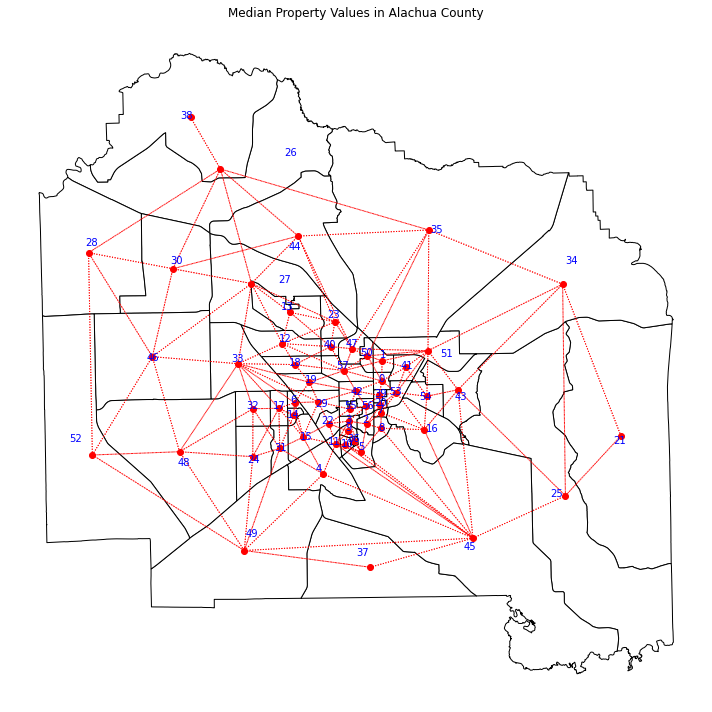

In [ ]:
# visualizing the edges on a map
fig, ax = plt.subplots(figsize=(10, 10))

ax.axis('off') # remove the axies

# 3514 is the projection index for the Alachua County
Alachua_shp.plot(color = 'white', edgecolor = 'black', ax = ax)
w_queen.plot(Alachua_shp, ax = ax,
             edge_kws=dict(color='r', linestyle=':', linewidth=1),
             node_kws=dict(marker='o', color='r'))

# edit the coordinates
# create a column for the coordinates

for idx, row in Alachua_shp.iterrows():
  plt.annotate(s=idx, horizontalalignment='center', color='blue', xy=row['coords'])

ax.set_title('Median Property Values in Alachua County')

plt.tight_layout()
plt.show()

## **Exercise.** Create a subset for Miami-Dade County. Visualize the property values, create the adjacency matrix, and visualize the edges.